In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import numpy.linalg as nla
import pandas as pnd
import sklearn.covariance as sklc

import sys
sys.path.append("C:/Users/pierr/OneDrive/Bureau/Dossier en haut à droite/Stage MIA 2023/Codes/Libraries")
import Fonctions as fc

### 0 - Paramètres

In [6]:
#Paramètres connus

N1 = 100
D1 = 10
L1 = 2
C1 = 2
eps = 0.01

### $III$ - RCA - Données simulées

#### 3.1 - Maximum Likelihood RCA

In [7]:
#Simulation des données

W_1, V_1, mu_1, sigma_2 = fc.sim_param_cov(D1,L1,C1,s4=0.5)
Z_1, Y_1, X_1 = fc.sim_data_cov(W_1,V_1,mu_1,sigma_2,N1)

mu_X = np.mean(X_1,axis=0)
Xc = np.array([x-mu_X for x in X_1])
mu_Y = np.mean(Y_1,axis=0)
Yc = np.array([y-mu_Y for y in Y_1])

Sigma = Xc@np.transpose(Xc) + sigma_2*np.eye(N1)

t = 2


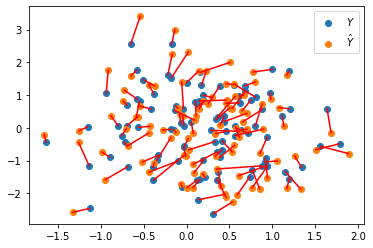

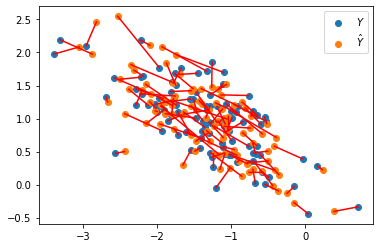

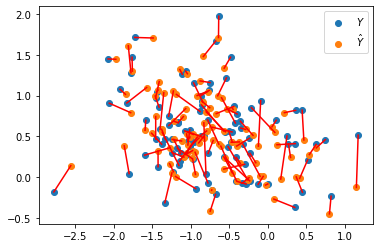

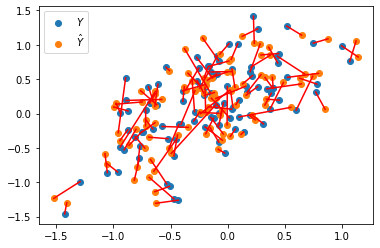

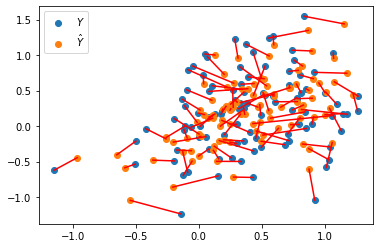

In [8]:
#Estimation de W, Z et V
W_hat, Z_hat, V_hat, Sigma_hat, sigma_hat_2 = fc.ML_RCA(Y_1,X_1,L1,err=eps)
mu_ML = np.mean(Y_1,axis=0)
Y_hat = Z_hat @ np.transpose(W_hat) + Xc@np.transpose(V_hat) + mu_ML

#Représentation graphique

for j in range(int(D1/2)):
    plt.figure()
    plt.scatter(Y_1[:,2*j],Y_1[:,2*j+1],label='$Y$')
    plt.scatter(Y_hat[:,2*j],Y_hat[:,2*j+1],label='$\hat{Y}$')

    for i in range(N1):
        plt.plot([Y_1[i][2*j],Y_hat[i][2*j]],[Y_1[i][2*j+1],Y_hat[i][2*j+1]],color='red')

    plt.legend()
    plt.show()

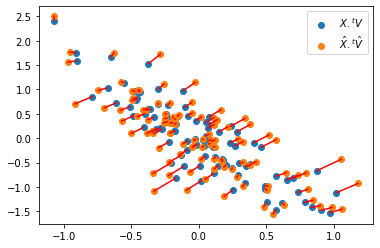

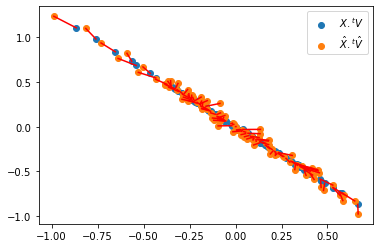

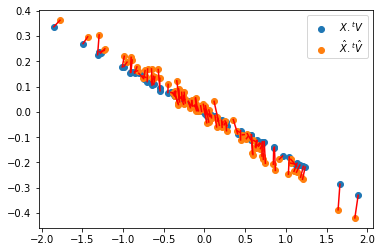

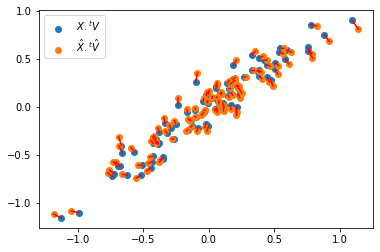

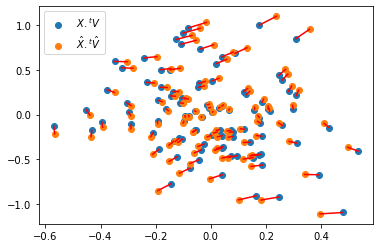

In [9]:
#Représentation graphique de la différence pour X.tV

XtV_hat = Xc@np.transpose(V_hat)
XtV_1 = Xc@np.transpose(V_1)

for j in range(int(D1/2)):
    plt.figure()
    plt.scatter(XtV_1[:,2*j],XtV_1[:,2*j+1],label='$X .^{t} V$')
    plt.scatter(XtV_hat[:,2*j],XtV_hat[:,2*j+1],label='$\hat{X} .^{t} \hat{V}$')

    for i in range(N1):
        plt.plot([XtV_1[i][2*j],XtV_hat[i][2*j]],[XtV_1[i][2*j+1],XtV_hat[i][2*j+1]],color='red')

    plt.legend()
    plt.show()

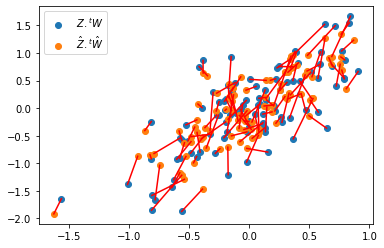

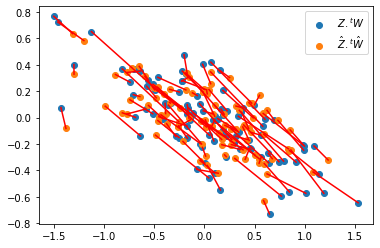

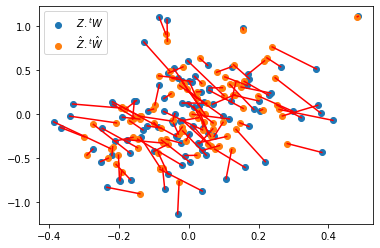

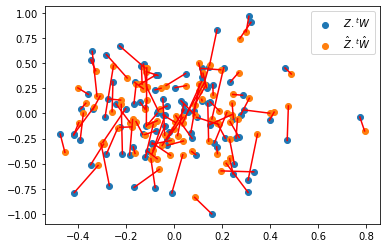

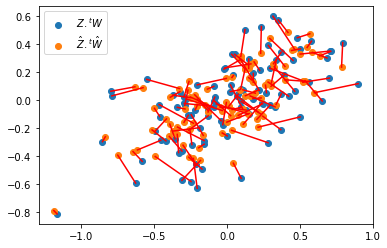

In [10]:
#Représentation graphique de la différence pour Z.tW

ZtW_hat = Z_hat@np.transpose(W_hat)
ZtW_1 = Z_1@np.transpose(W_1)

for j in range(int(D1/2)):
    plt.figure()
    plt.scatter(ZtW_1[:,2*j],ZtW_1[:,2*j+1],label='$Z .^{t} W$')
    plt.scatter(ZtW_hat[:,2*j],ZtW_hat[:,2*j+1],label='$\hat{Z} .^{t} \hat{W}$')

    for i in range(N1):
        plt.plot([ZtW_1[i][2*j],ZtW_hat[i][2*j]],[ZtW_1[i][2*j+1],ZtW_hat[i][2*j+1]],color='red')

    plt.legend()
    plt.show()

In [13]:
#Indépendance (ou à peu près)

T1 = 100
X_tab = np.zeros((T1,N1,C1))
Z_tab = np.zeros((T1,N1,L1))

for t in range(T1):
    W_1, V_1, mu_1, sigma_2 = fc.sim_param_cov(D1,L1,C1,0.5)
    Z_1, Y_1, X_1 = fc.sim_data_cov(W_1,V_1,mu_1,sigma_2,N1)
    W_hat, Z_hat, V_hat, Sigma_hat, sigma_hat_2 = fc.ML_RCA(Y_1,X_1,L1,err=eps,tempo=False)
    X_tab[t] = X_1
    Z_tab[t] = Z_hat

mu_X = np.mean(X_tab,axis=0)
mu_Z = np.mean(Z_tab,axis=0)
Xc_tab = np.array([fc.orthogonalize(X-mu_X) for X in X_tab])
Zc_tab = np.array([fc.orthogonalize(Z-mu_Z) for Z in Z_tab])

covariance_1 = np.mean(np.array([1/N1 * np.transpose(Xc_tab[t]) @ Zc_tab[t] for t in range(T1)]), axis = 0)
print(covariance_1)

<ipython-input-13-ed45539cda24>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  Z_tab[t] = Z_hat


[[ 0.00018627 -0.00035454]
 [-0.00014923 -0.00020795]]


#### 3.2 - Algorithme hybride EM/RCA

In [ ]:
#Simulation des données

la = -np.log(rd.rand())
W_1, Lambda_1, sigma2 = fc.sim_param_LRPSI(0,0,1,1,la,D1,L1)
Z_1, Y_1, X_1 = fc.sim_data_LRPSI(W_1,Lambda_1,N1,sigma2)

mu_X = np.mean(X_1,axis=0)
Xc = np.array([x-mu_X for x in X_1])
mu_Y = np.mean(Y_1,axis=0)
Yc = np.array([y-mu_Y for y in Y_1])

SpL, P = nla.eig(Lambda_1)

In [ ]:
#Estimation de W et Z
W_hat,Z_hat,Lambda_hat,sigma2 = fc.EM_RCA_LRPSI(Y_1,X_1,L1)

#Reconcstitution de Y
Y_hat = Z_hat @ np.transpose(W_hat) + Xc + mu_Y

for j in range(int(D1/2)):
    plt.figure()
    plt.scatter(Y_1[:,2*j],Y_1[:,2*j+1],label='$Y$')
    plt.scatter(Y_hat[:,2*j],Y_hat[:,2*j+1],label='$\check{Y}$')

    for i in range(N1):
        plt.plot([Y_1[i][2*j],Y_hat[i][2*j]],[Y_1[i][2*j+1],Y_hat[i][2*j+1]],color='red')

    plt.legend()
    plt.show()